## Data Acquisition

In [2]:
# Librerias necesarias
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
# primero subir el archivo csv a drive
# Disponible en Kaggle en: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

df = pd.read_csv("https://raw.githubusercontent.com/rebecacuan/Tareas-DCDP/main/ProyectoFINAL/Datos/Student_performance_data%20_.csv",
                 dtype={"Gender": "category",
                        "Ethnicity": "category",
                        "ParentalEducation": "category",
                        "Tutoring": "category",
                        "ParentalSupport": "category",
                        "Extracurricular": "category",
                        "Sports": "category",
                        "Music": "category",
                        "Volunteering": "category"})

## Data Preprocessing

### Data Cleaning

Revosaremos si es que hay coljumnas que requieren removgerse porque no son importantes para el analisis y/o no entregar informacion relevante

In [ ]:
# Mostrar los primeros 5 registros
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   StudentID          2392 non-null   int64   
 1   Age                2392 non-null   int64   
 2   Gender             2392 non-null   category
 3   Ethnicity          2392 non-null   category
 4   ParentalEducation  2392 non-null   category
 5   StudyTimeWeekly    2392 non-null   float64 
 6   Absences           2392 non-null   int64   
 7   Tutoring           2392 non-null   category
 8   ParentalSupport    2392 non-null   category
 9   Extracurricular    2392 non-null   category
 10  Sports             2392 non-null   category
 11  Music              2392 non-null   category
 12  Volunteering       2392 non-null   category
 13  GPA                2392 non-null   float64 
 14  GradeClass         2392 non-null   float64 
dtypes: category(9), float64(3), int64(3)
memory usage: 134.

In [ ]:
# mostrar principales estadisticos de variables numericas
df.describe()

,StudentID,Age,StudyTimeWeekly,Absences,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,9.771992,14.541388,1.906186,2.983696
std,690.655244,1.123798,5.652774,8.467417,0.915156,1.233908
min,1001.000000,15.000000,0.001057,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,5.043079,7.000000,1.174803,2.000000
50%,2196.500000,16.000000,9.705363,15.000000,1.893393,4.000000
75%,2794.250000,17.000000,14.408410,22.000000,2.622216,4.000000
max,3392.000000,18.000000,19.978094,29.000000,4.000000,4.000000


No hay numero faltantes com o se puede ver en el resultado de `df.info()` y `df.describe()`

### Exploracion de datos

Revisaremos la distribucion de los datos de cada columna

<ipython-input-15-f87b5ff144b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax[0][0].bar(df.groupby('Gender').size().index, df.groupby('Gender').size())
<ipython-input-15-f87b5ff144b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax[0][0].bar(df.groupby('Gender').size().index, df.groupby('Gender').size())
<ipython-input-15-f87b5ff144b5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax[0][1].bar(df.groupby('Et

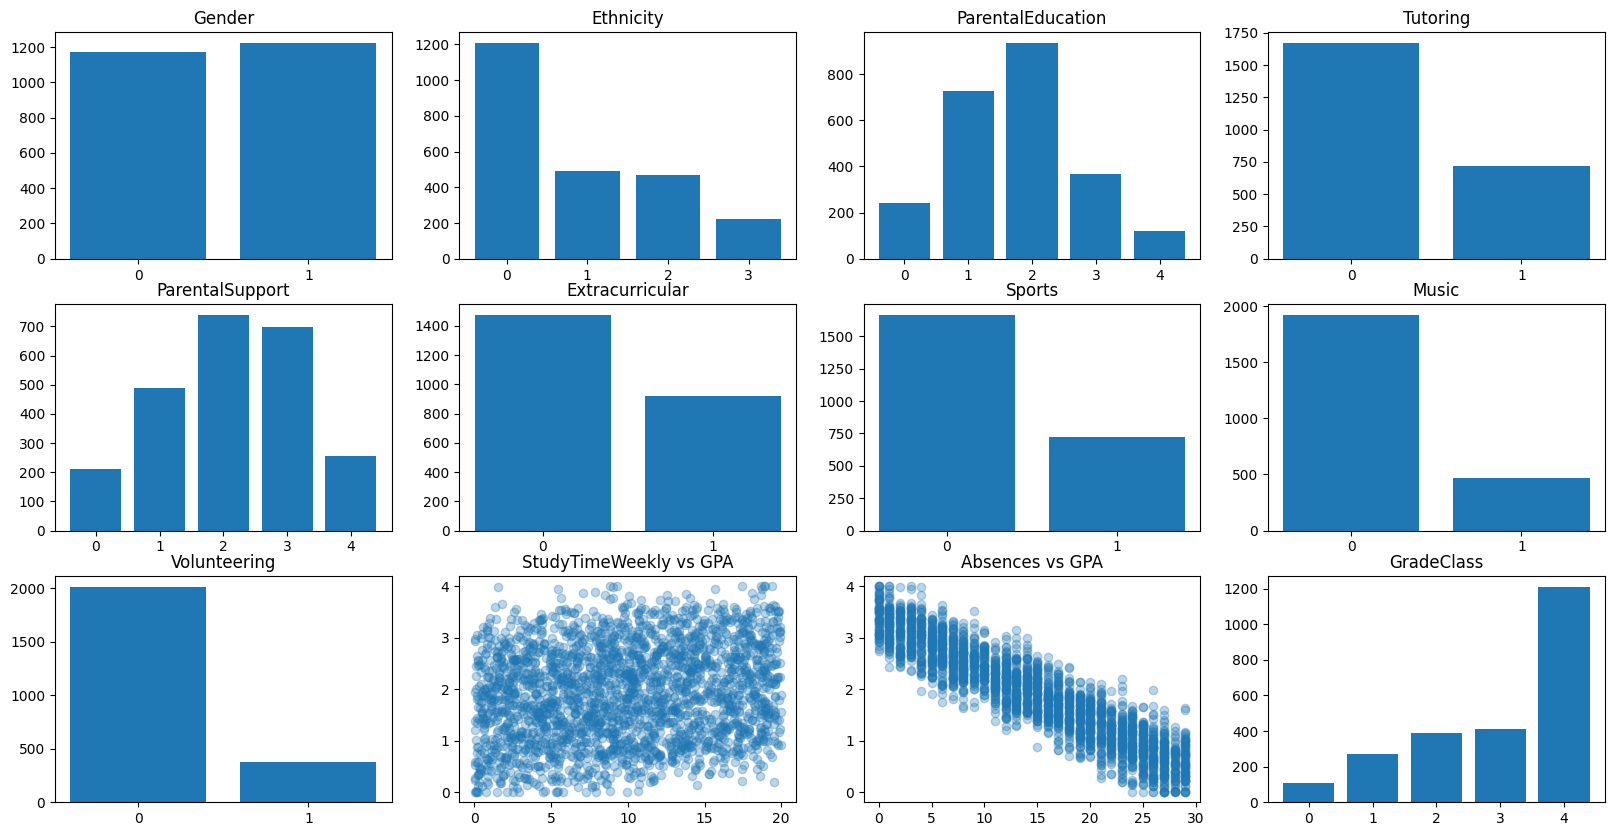

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
ax[0][0].bar(df.groupby('Gender').size().index, df.groupby('Gender').size())
ax[0][0].title.set_text('Gender')
ax[0][1].bar(df.groupby('Ethnicity').size().index, df.groupby('Ethnicity').size())
ax[0][1].title.set_text('Ethnicity')
ax[0][2].bar(df.groupby('ParentalEducation').size().index, df.groupby('ParentalEducation').size())
ax[0][2].title.set_text('ParentalEducation')
ax[0][3].bar(df.groupby('Tutoring').size().index, df.groupby('Tutoring').size())
ax[0][3].title.set_text('Tutoring')
ax[1][0].bar(df.groupby('ParentalSupport').size().index, df.groupby('ParentalSupport').size())
ax[1][0].title.set_text('ParentalSupport')
ax[1][1].bar(df.groupby('Extracurricular').size().index, df.groupby('Extracurricular').size())
ax[1][1].title.set_text('Extracurricular')
ax[1][2].bar(df.groupby('Sports').size().index, df.groupby('Sports').size())
ax[1][2].title.set_text('Sports')
ax[1][3].bar(df.groupby('Music').size().index, df.groupby('Music').size())
ax[1][3].title.set_text('Music')
ax[2][0].bar(df.groupby('Volunteering').size().index, df.groupby('Volunteering').size())
ax[2][0].title.set_text('Volunteering')
ax[2][1].scatter(df['StudyTimeWeekly'], df['GPA'], alpha=0.3)
ax[2][1].title.set_text('StudyTimeWeekly vs GPA')
ax[2][2].scatter(df['Absences'], df['GPA'], alpha=0.3)
ax[2][2].title.set_text('Absences vs GPA')
ax[2][3].bar(df.groupby('GradeClass').size().index, df.groupby('GradeClass').size())
ax[2][3].title.set_text('GradeClass')
plt.show()

In [ ]:
# Remover columnas que no son necesarias para el analisis: StudentId (no entrega informacion relevante) y GPA (se seleciono un problema de clasificacion)
df = df.drop(['StudentID', 'GPA'], axis=1)

In [ ]:
# convertir las variables catgorias a valores numericos (binary features)
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
oh_df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

In [ ]:
# Validamos que las 2 columnas que eliminamos del quitamnos del dataset no estan presentes y que las columnas categoricas fueron tranformadas a columnas binarias
oh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2392 non-null   int64  
 1   StudyTimeWeekly      2392 non-null   float64
 2   Absences             2392 non-null   int64  
 3   GradeClass           2392 non-null   float64
 4   Gender_1             2392 non-null   bool   
 5   Ethnicity_1          2392 non-null   bool   
 6   Ethnicity_2          2392 non-null   bool   
 7   Ethnicity_3          2392 non-null   bool   
 8   ParentalEducation_1  2392 non-null   bool   
 9   ParentalEducation_2  2392 non-null   bool   
 10  ParentalEducation_3  2392 non-null   bool   
 11  ParentalEducation_4  2392 non-null   bool   
 12  Tutoring_1           2392 non-null   bool   
 13  ParentalSupport_1    2392 non-null   bool   
 14  ParentalSupport_2    2392 non-null   bool   
 15  ParentalSupport_3    2392 non-null   b

In [ ]:
# Convertir la columna ClassGrade a "category"
oh_df['GradeClass'] = oh_df['GradeClass'].astype('category')

## Split de los datos

In [ ]:
# Se va a utilizar un muestreo estratificado para mantener la proporcion de la feature "GradeClass" en ambos conjuntos
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(oh_df, oh_df["GradeClass"]):
    strat_train_set = oh_df.loc[train_index]
    strat_test_set = oh_df.loc[test_index]

In [ ]:
oh_df["GradeClass"].value_counts() / len(df)

,count
GradeClass,
4.0,0.506271
3.0,0.173077
2.0,0.163462
1.0,0.112458
0.0,0.044732


In [ ]:
# La proporcion de los datos de test muy similares a los datos del dataset completo
strat_test_set["GradeClass"].value_counts() / len(strat_test_set)

,count
GradeClass,
4.0,0.507307
3.0,0.173278
2.0,0.162839
1.0,0.112735
0.0,0.043841


In [ ]:
# separar los atributos de las etiquestas tanto para los dataset de entrenamiento como de prueba
X_train = strat_train_set.drop("GradeClass", axis=1)
y_train = strat_train_set["GradeClass"].copy()

X_test = strat_test_set.drop("GradeClass", axis=1)
y_test = strat_test_set["GradeClass"].copy()

In [ ]:
# Escalamiento de los datos usando StandardScaler
scaler = StandardScaler()
strat_train_set = scaler.fit_transform(X_train)
strat_test_set = scaler.transform(X_test)

#### Logistic Regression

Aqui se aplicara entreanara un modelo de Logistic Regression y determinara su *Accuracy*

In [ ]:
# Se define max_iter=2000 para asegurar que converja el modelo y un random_state para asegurar reproiducibilidad. Todos los demas parametros son los de default
clf = LogisticRegression(max_iter=2000, random_state=42)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [ ]:
print(f"Accuracy en el entrenamiento: {clf.score(X_train,y_train):.4f}")
print(f"Accuracy en la prueba: {clf.score(X_test,y_test):.4f}")

Accuracy en el entrenamiento: 0.7444
Accuracy en la prueba: 0.7182


In [ ]:
# Generacion de matriz de confusion
lg_predictions = clf.predict(X_test)
lg_score = clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, lg_predictions)

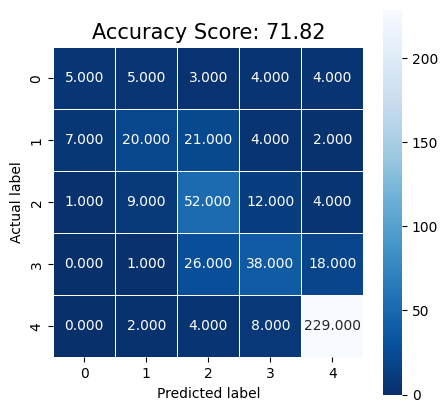

In [ ]:
# Grafica de matriz de confusion
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}'.format(100 * lg_score)
plt.title(all_sample_title, size = 15);

##### Logisic Regression con Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

p_feats = PolynomialFeatures(2,include_bias=False)
log_reg = LogisticRegression(max_iter=100000, random_state=42, solver='saga')

pl = Pipeline([('pf',p_feats),
               ('clf',log_reg)])

pl.fit(X_train,y_train)

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('clf',
                 LogisticRegression(max_iter=100000, random_state=42,
                                    solver='saga'))])

In [ ]:
print(f"Accuracy en el entrenamiento: {pl.score(X_train,y_train):.4f}")
print(f"Accuracy en la prueba: {pl.score(X_test,y_test):.4f}")

Accuracy en el entrenamiento: 0.7836
Accuracy en la prueba: 0.7056


Se utiliza el solver='saga' porque el por defecto no coverge inlcuso utilizando el max_iter=100000.
Como vemos el valor de accuracy es menor que los valores de logistic regression por defecto

##### Uso de GRIDSEARCHCV para buscar los mejores parametros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'max_iter': [3000], 'solver': ['saga']}
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
param_grid

In [ ]:
# Veamos los mejores hiperparametros
print(f"Best score: {grid_search.best_score_:.4f}")
print(f"Best params: {grid_search.best_params_}")

Best score: 0.7067
Best params: {'C': 1, 'max_iter': 3000, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
clf_lr2 = LogisticRegression(max_iter=3000, random_state=42, solver='saga', C=1, penalty='l1')
clf_lr2.fit(X_train,y_train)
print(f"Accuracy en el entrenamiento: {clf_lr2.score(X_train,y_train):.4f}")
print(f"Accuracy en la prueba: {clf_lr2.score(X_test,y_test):.4f}")

Accuracy en el entrenamiento: 0.7423
Accuracy en la prueba: 0.7223


In [ ]:
# Ver los coeficientes
odds = np.exp(clf_lr2.coef_[4])
pd.DataFrame(odds,
             X_train.columns,
             columns=['coef'])

,coef
Age,0.978207
StudyTimeWeekly,0.880712
Absences,1.570193
Gender_1,0.912696
Ethnicity_1,1.000000
Ethnicity_2,1.000000
Ethnicity_3,0.807367
ParentalEducation_1,0.990615
ParentalEducation_2,0.993871
ParentalEducation_3,0.954391


Vamos a utilizar un gridsearch con penalty='l2'

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'max_iter': [3000], 'solver': ['lbfgs', 'newton-cg', 'sag','saga']}
clf_lr = LogisticRegression(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
# Veamos los mejores hiperparametros
print(f"Best score: {grid_search.best_score_:.4f}")
print(f"Best params: {grid_search.best_params_}")

Best score: 0.7036
Best params: {'C': 1, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
clf_lr3 = LogisticRegression(max_iter=3000, random_state=42, solver='saga', C=1, penalty='l2')
clf_lr3.fit(X_train,y_train)
print(f"Accuracy en el entrenamiento: {clf_lr3.score(X_train,y_train):.4f}")
print(f"Accuracy en la prueba: {clf_lr3.score(X_test,y_test):.4f}")

Accuracy en el entrenamiento: 0.7465
Accuracy en la prueba: 0.7203


Usar SelectKBest para seleccionar featues y ver como afecta el accuracy del resultado

In [ ]:
selector = SelectKBest(chi2, k=14)
X_train_selected = selector.fit_transform(X_train, y_train)   # Entrenamos y transformamos el de entrenamiento
X_test_selected = selector.transform(X_test)        # Sólo transformamos el de prueba

In [ ]:
print(f"Teníamos {X_train.shape[1]} variables originalmente, nos quedamos con {len(selector.get_feature_names_out())}")
print(f"Variables originales:\n{X_train.columns.to_list()}\n")
print(f"Variables con las que nos quedamos:\n{selector.get_feature_names_out()}\n")

Teníamos 20 variables originalmente, nos quedamos con 14
Variables originales:
['Age', 'StudyTimeWeekly', 'Absences', 'Gender_1', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'ParentalEducation_1', 'ParentalEducation_2', 'ParentalEducation_3', 'ParentalEducation_4', 'Tutoring_1', 'ParentalSupport_1', 'ParentalSupport_2', 'ParentalSupport_3', 'ParentalSupport_4', 'Extracurricular_1', 'Sports_1', 'Music_1', 'Volunteering_1']

Variables con las que nos quedamos:
['StudyTimeWeekly' 'Absences' 'Ethnicity_2' 'Ethnicity_3'
 'ParentalEducation_4' 'Tutoring_1' 'ParentalSupport_1'
 'ParentalSupport_2' 'ParentalSupport_3' 'ParentalSupport_4'
 'Extracurricular_1' 'Sports_1' 'Music_1' 'Volunteering_1']



In [ ]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'max_iter': [3000], 'solver': ['saga']}
clf_lr_selected = LogisticRegression(max_iter=1000, random_state=42)
grid_search_selected = GridSearchCV(clf_lr_selected, param_grid, cv=5, scoring='accuracy')
grid_search_selected.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [3000],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='accuracy')

In [ ]:
# Veamos los mejores hiperparametros
print(f"Best score: {grid_search_selected.best_score_:.4f}")
print(f"Best params: {grid_search_selected.best_params_}")

Best score: 0.7151
Best params: {'C': 1, 'max_iter': 3000, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
clf_lr_selected = LogisticRegression(max_iter=3000, random_state=42, solver='saga', C=1, penalty='l1')
clf_lr_selected.fit(X_train_selected,y_train)
print(f"Accuracy en el entrenamiento: {clf_lr_selected.score(X_train_selected,y_train):.4f}")
print(f"Accuracy en la prueba: {clf_lr_selected.score(X_test_selected,y_test):.4f}")

Accuracy en el entrenamiento: 0.7381
Accuracy en la prueba: 0.7370


In [ ]:
# Ver los coeficientes
odds = np.exp(clf_lr_selected.coef_[0])
pd.DataFrame(odds,
             selector.get_feature_names_out(),
             columns=['coef'])

,coef
StudyTimeWeekly,1.080722
Absences,0.874932
Ethnicity_2,1.538189
Ethnicity_3,0.851647
ParentalEducation_4,1.000000
Tutoring_1,2.510916
ParentalSupport_1,1.000000
ParentalSupport_2,0.990683
ParentalSupport_3,3.211383
ParentalSupport_4,5.649132


##### **Conclusiones para Logistic Regression**
Hasta aqui el mejor los mejores parametros son los siguientes C=1, penalty='l1', solver='saga' y con un 73.7% de accuracy cuando se selecciona las mejores 14 features (SelectKBest=14)

#### Decision Trees

Primer modelo a entrenar con los valores por defecto

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)

In [ ]:
print(f"Accuracy entrenamiento: {clf_dt.score(X_train,y_train):.4f}")
print(f"Accuracy prueba: {clf_dt.score(X_test,y_test):.4f}")

Accuracy entrenamiento: 1.0000
Accuracy prueba: 0.6013


O)bservamos que para los valores de defecto del modelo, la accuracy del conjunto de entrenamiento es de 1 y el de prueba de 0.6, mostrando overfitting

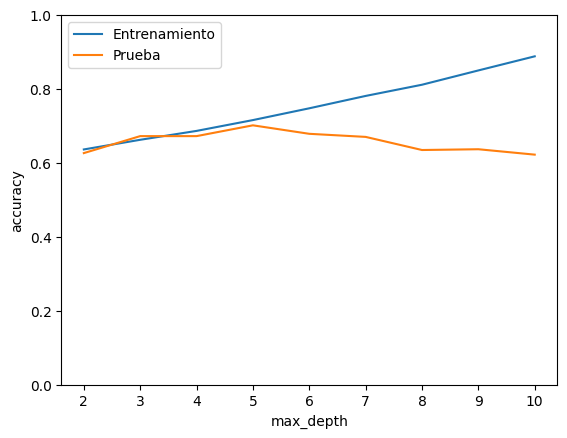

In [ ]:
depths = [2,3,4,5,6,7,8,9,10]
train_scores = []
test_scores = []

for d in depths:
    clf_dt = DecisionTreeClassifier(max_depth=d)
    clf_dt.fit(X_train,y_train)
    y_pred = clf_dt.predict(X_test)
    train_scores.append(clf_dt.score(X_train,y_train))
    test_scores.append(clf_dt.score(X_test,y_test))

plt.figure()
plt.plot(depths,train_scores,label='Entrenamiento')
plt.plot(depths,test_scores,label='Prueba')
plt.legend(loc='best')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.ylim([0,1])
plt.show()

In [ ]:
# Calcular la accuracy para max_depth=5, domnde muestra la mejor accuracy en el grafico anterior
clf_dt2 = DecisionTreeClassifier(max_depth=5)
clf_dt2.fit(X_train,y_train)
y_pred2 = clf_dt2.predict(X_test)

In [ ]:
print(f"Accuracy entrenamiento: {clf_dt2.score(X_train,y_train):.4f}")
print(f"Accuracy prueba: {clf_dt2.score(X_test,y_test):.4f}")

Accuracy entrenamiento: 0.7156
Accuracy prueba: 0.7015


In [ ]:
clf_dt = DecisionTreeClassifier(max_depth=5)
clf_dt.fit(X_train_selected,y_train)
y_pred = clf_dt.predict(X_test_selected)

print(f"Accuracy entrenamiento: {clf_dt.score(X_train_selected,y_train):.4f}")
print(f"Accuracy prueba: {clf_dt.score(X_test_selected,y_test):.4f}")

Accuracy entrenamiento: 0.7156
Accuracy prueba: 0.7015


Utilizar GridsearchCV para encontra los mejores parametros del modelo

In [ ]:
param_grid = {'max_features': [None, 'sqrt', 'log2'],
              'ccp_alpha': [0.0, 0.1, .01, .001],
              'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11, None],
              'criterion' :['gini', 'entropy', 'log_loss']
             }

clf_dt3 = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=clf_dt3, param_grid=param_grid, cv=5, scoring='accuracy', verbose=True)
grid_search_dt.fit(X_train_selected, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, None],
                         'max_features': [None, 'sqrt', 'log2']},
             scoring='accuracy', verbose=True)

In [ ]:
print(f"Best score: {grid_search_dt.best_score_:.4f}")
print(f"Best params: {grid_search_dt.best_params_}")

Best score: 0.6853
Best params: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': None}


In [ ]:
# Calcular la accuracy para max_depth=5, domnde muestra la mejor accuracy en el grafico anterior
clf_dt3 = DecisionTreeClassifier(max_depth=9, criterion='gini', ccp_alpha=0.001, max_features=None)
clf_dt3.fit(X_train_selected,y_train)
y_pred2 = clf_dt3.predict(X_test_selected)

print(f"Accuracy entrenamiento: {clf_dt3.score(X_train_selected,y_train):.4f}")
print(f"Accuracy prueba: {clf_dt3.score(X_test_selected,y_test):.4f}")

Accuracy entrenamiento: 0.7883
Accuracy prueba: 0.6743


##### **Conclusiones para decision Trees**
El mejor modelo es con max_depth=5 y del demas parametros de default, con un 70.15% de accuracy

### Random Forest

Primero utilizaremos el modelo con los parametros de dafault

In [ ]:
clf_rf = RandomForestClassifier(random_state=42)

clf_rf.fit(X_train,y_train)
y_train_pred_rf = clf_rf.predict(X_train)
y_pred_rf = clf_rf.predict(X_test)

Train Accuracy: 1.0
Test Accuracy: 0.689
Test Recall: 0.50243
Test Precision: 0.563


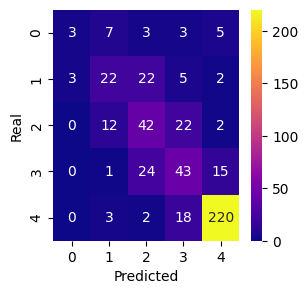

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Train Accuracy: {round(accuracy_score(y_train,y_train_pred_rf),3)}")
print(f"Test Accuracy: {round(accuracy_score(y_test,y_pred_rf),3)}")
print(f"Test Recall: {round(recall_score(y_test,y_pred_rf, average = 'macro'),5)}")
print(f"Test Precision: {round(precision_score(y_test,y_pred_rf, average = 'macro'),3)}")

target_labels = [0,1, 2, 3, 4]

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred_rf)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

In [ ]:
clf_rf_selected = RandomForestClassifier(random_state=42)

clf_rf_selected.fit(X_train_selected,y_train)
y_train_pred_rf_selected = clf_rf_selected.predict(X_train_selected)
y_pred_rf_selected = clf_rf_selected.predict(X_test_selected)

Train Accuracy: 0.999
Test Accuracy: 0.697
Test Recall: 0.53103
Test Precision: 0.558


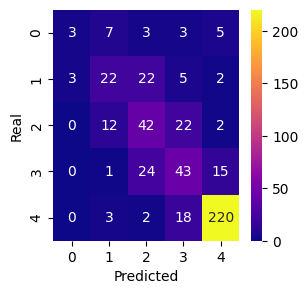

In [ ]:
print(f"Train Accuracy: {round(accuracy_score(y_train,y_train_pred_rf_selected),3)}")
print(f"Test Accuracy: {round(accuracy_score(y_test,y_pred_rf_selected),3)}")
print(f"Test Recall: {round(recall_score(y_test,y_pred_rf_selected, average = 'macro'),5)}")
print(f"Test Precision: {round(precision_score(y_test,y_pred_rf_selected, average = 'macro'),3)}")

target_labels = [0,1, 2, 3, 4]

plt.figure(figsize=(3,3))
cm_selected = confusion_matrix(y_test,y_pred_rf)
s_cm_selected = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm_selected.set(xlabel='Predicted',ylabel='Real')
plt.show()

In [ ]:
# Crear parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None],
}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, verbose = 3)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END .......................max_depth=3;, score=0.504 total time=   0.5s
[CV 2/5] END .......................max_depth=3;, score=0.507 total time=   0.4s
[CV 3/5] END .......................max_depth=3;, score=0.509 total time=   0.5s
[CV 4/5] END .......................max_depth=3;, score=0.508 total time=   0.4s
[CV 5/5] END .......................max_depth=3;, score=0.510 total time=   0.4s
[CV 1/5] END .......................max_depth=4;, score=0.642 total time=   0.3s
[CV 2/5] END .......................max_depth=4;, score=0.629 total time=   0.4s
[CV 3/5] END .......................max_depth=4;, score=0.608 total time=   0.5s
[CV 4/5] END .......................max_depth=4;, score=0.586 total time=   0.3s
[CV 5/5] END .......................max_depth=4;, score=0.613 total time=   0.5s
[CV 1/5] END .......................max_depth=5;, score=0.645 total time=   0.7s
[CV 2/5] END .......................max_depth=5;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, None]},
             verbose=3)

In [ ]:
print(f"Best score: {grid_search_rf.best_score_:.4f}")
print(f"Best params: {grid_search_rf.best_params_}")

Best score: 0.6973
Best params: {'max_depth': 16}


In [ ]:
clf_rf2 = RandomForestClassifier(random_state=42, max_depth=16)

clf_rf2.fit(X_train,y_train)
y_train_pred_rf2 = clf_rf2.predict(X_train)
y_pred_rf2 = clf_rf2.predict(X_test)

Train Accuracy: 0.999
Test Accuracy: 0.695
Test Recall: 0.50203
Test Precision: 0.541


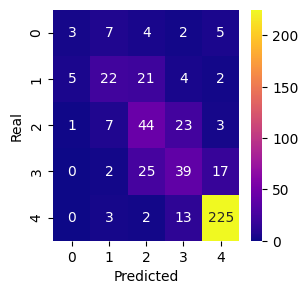

In [ ]:
print(f"Train Accuracy: {round(accuracy_score(y_train,y_train_pred_rf2),3)}")
print(f"Test Accuracy: {round(accuracy_score(y_test,y_pred_rf2),3)}")
print(f"Test Recall: {round(recall_score(y_test,y_pred_rf2, average = 'macro'),5)}")
print(f"Test Precision: {round(precision_score(y_test,y_pred_rf2, average = 'macro'),3)}")

target_labels = [0,1, 2, 3, 4]

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred_rf2)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

Train Accuracy: 0.998
Test Accuracy: 0.706
Test Recall: 0.54271
Test Precision: 0.574


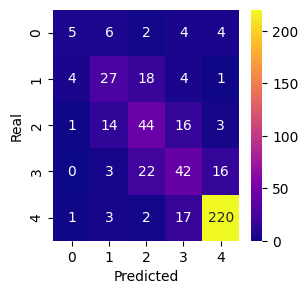

In [ ]:
clf_rf3 = RandomForestClassifier(random_state=42, max_depth=16)

clf_rf3.fit(X_train_selected,y_train)
y_train_pred_rf3 = clf_rf3.predict(X_train_selected)
y_pred_rf3 = clf_rf3.predict(X_test_selected)


print(f"Train Accuracy: {round(accuracy_score(y_train,y_train_pred_rf3),3)}")
print(f"Test Accuracy: {round(accuracy_score(y_test,y_pred_rf3),3)}")
print(f"Test Recall: {round(recall_score(y_test,y_pred_rf3, average = 'macro'),5)}")
print(f"Test Precision: {round(precision_score(y_test,y_pred_rf3, average = 'macro'),3)}")

target_labels = [0,1, 2, 3, 4]

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred_rf3)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

Muestra 70.1% de accuracy (usando las 15 mejores features de acuerdo a SelectKBest) sin embargo la accuracy de prueba es del 88%, lo que muestra overfitting del modelo

#### SVM

In [ ]:
clf_svm = SVC(kernel='linear',C=1, random_state=42)
clf_svm.fit(X_train, y_train)
clf_svm.score(X_train,y_train)

0.7626764244641924

In [ ]:
clf_svm.score(X_test,y_test)    # Este score es el accuracy

0.7390396659707724

Usando SelectKBest=14

In [ ]:
clf_svm_selected = SVC(kernel='linear',C=1, random_state=42)
clf_svm_selected.fit(X_train_selected, y_train)
clf_svm_selected.score(X_test_selected,y_test)

0.7661795407098121

In [ ]:
# defining parameter range: toma 15-20 min en correr
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)
grid.score(X_test,y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.736 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.744 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.713 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.746 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.712 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.640 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

0.7390396659707724

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
clf_svm = SVC(kernel='linear',C=1, gamma=1,random_state=42)
clf_svm.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear', random_state=42)

In [ ]:
print(f"Train mean accuracy: {clf_svm.score(X_train, y_train):.4f}")
print(f"Test mean accuracy: {clf_svm.score(X_test, y_test):.4f}")

Train mean accuracy: 0.7627
Test mean accuracy: 0.7390


In [ ]:
# toma 6 minutos en correr
clf_svm = SVC(kernel='poly',gamma=1,degree=2,C=1)
clf_svm.fit(X_train, y_train)

print(f"Accuracy promedio de entrenamiento: {round(clf_svm.score(X_train, y_train),3)}")
print(f"Accuracy promedio de prueba: {round(clf_svm.score(X_test, y_test),3)}")

Correr el modelo SVM para los mejores parametros encontrados anteriormente utilizando las SelectKBest=14

In [ ]:
# defining parameter range: toma 15-20 min en correr
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, scoring='accuracy')

# fitting the model for grid search
grid.fit(X_train_selected, y_train)
grid.score(X_test_selected,y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.736 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.749 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.715 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.738 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.728 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

0.7411273486430062

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [ ]:
clf_svm_selected = SVC(kernel='rbf',C=100, gamma=0.001,random_state=42)
clf_svm_selected.fit(X_train_selected, y_train)

print(f"Train mean accuracy: {clf_svm_selected.score(X_train_selected, y_train):.4f}")
print(f"Test mean accuracy: {clf_svm_selected.score(X_test_selected, y_test):.4f}")

Train mean accuracy: 0.7747
Test mean accuracy: 0.7411


In [ ]:
# defining parameter range: toma 15-20 min en correr
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(), param_grid, verbose = 3, scoring='balanced_accuracy')

# fitting the model for grid search
grid.fit(X_train_selected, y_train)
grid.score(X_test_selected,y_test)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [ ]:
clf_svm_selected = SVC(kernel='rbf',C=10, gamma=0.01,random_state=42)
clf_svm_selected.fit(X_train_selected, y_train)

print(f"Train mean accuracy: {clf_svm_selected.score(X_train_selected, y_train):.4f}")
print(f"Test mean accuracy: {clf_svm_selected.score(X_test_selected, y_test):.4f}")

Train mean accuracy: 0.7778
Test mean accuracy: 0.7495


**Conclusiones para SVM**


 El mejor modelo encontrado es para los parametros kernel='rbf',C=10, gamma=0.01, que tiene una accuracy de 74.95% para las mejores 14 features (SelectKBest)

### MLP

In [ ]:
# Transformar las etiquestas tanto de prueba como entrenamiento a variables binarias
y_train_mlp = to_categorical(y_train,num_classes=5)
y_test_mlp = to_categorical(y_test,num_classes=5)
y_test_original = y_test.copy()

In [ ]:
# Convertir a arreglos numericos los conjuntos de prueba y entrenamiento
X_train_mlp = np.asarray(X_train_selected).astype(np.float32)
X_test_mlp = np.asarray(X_test_selected).astype(np.float32)

In [ ]:
# Entreanamiento de una red MPL
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=14)) #
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 16)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 949 (3.71 KB)

 Trainable params: 949 (3.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Uso de MPL con optimizador Adan con tasa de apredizaje por defecto
model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc']
		  )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
n_epocas = 64
history = model.fit(X_train_mlp, y_train_mlp, epochs=n_epocas, callbacks=[es], validation_split=0.1)

Epoch 1/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - acc: 0.5177 - loss: 1.5642 - val_acc: 0.4792 - val_loss: 1.1191
Epoch 2/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5762 - loss: 0.9929 - val_acc: 0.6094 - val_loss: 1.0291
Epoch 3/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6350 - loss: 0.9554 - val_acc: 0.6354 - val_loss: 0.9784
Epoch 4/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6817 - loss: 0.8710 - val_acc: 0.6250 - val_loss: 0.9709
Epoch 5/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6550 - loss: 0.8728 - val_acc: 0.6562 - val_loss: 0.9429
Epoch 6/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6737 - loss: 0.8505 - val_acc: 0.6562 - val_loss: 0.9344
Epoch 7/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6850 - loss: 0.8318 - val_acc: 0.6667 - val_loss: 0.9286
Epoch 8/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6817 - loss: 0.8262 - val_acc: 0.6562 - val_loss: 0.9093
Epoch 9/64
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7107 - loss:

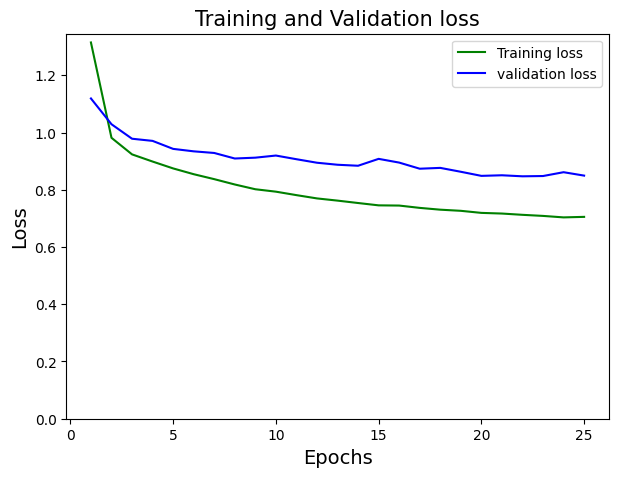

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,len(history.epoch)+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
plt.ylim([0,None])
plt.show()

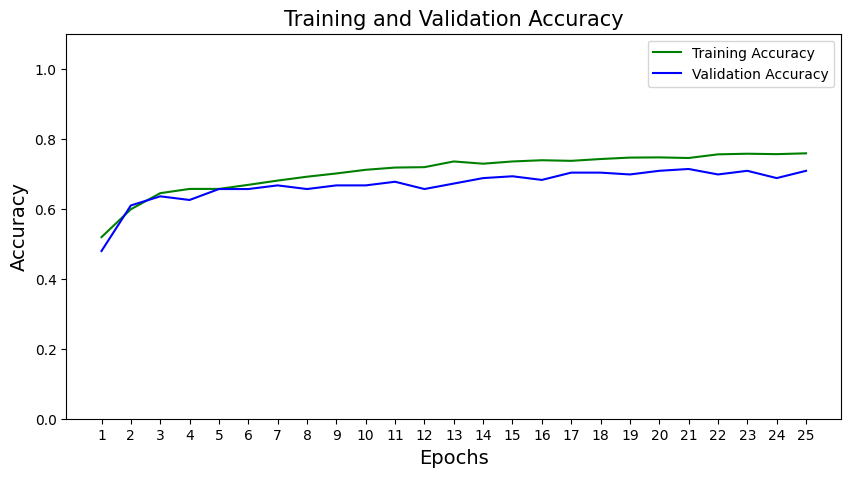

In [ ]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']

epochs = range(1,len(history.epoch)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.ylim([0,1.1])
plt.show()

In [ ]:
predictions_matrix = model.predict(X_test_mlp)
predictions = np.argmax(predictions_matrix, axis=1)  # Prueba a comentar esta línea y discutamos qué pasa

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

Test Accuracy: 0.7223382045929019
Test Recall: 0.5340214745837235
Test Precision: 0.5424198374970847


**Conclusiones MPL**

Se puede ver que la accuracy es ligeramente inferior a SVM, Logistic Regression: 72.2% vs 74.95%, ambos utilizando las mejores 14 features de acuerdo a SelectKBest.
Sin embardo, el modelo mas interpretable es el de Logistic Regression con una accuracy del 73.7%, ~2 pp menos que el modelo de SVM